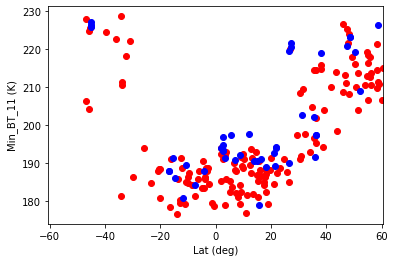

197.6403


In [1]:
#tutorial https://realpython.com/logistic-regression-python/

def read_text(fname):
    fo=open(fname,'r') #create file object
    headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from scipy.stats import spearmanr

fname='/data/keeling/a/yulanh/mydata/OT_modis/OT_candidates_Atrain/OT_property_combine_bf_OTnOT_2007.txt'

fname8='/data/keeling/a/yulanh/mydata/OT_modis/OT_candidates_Atrain/OT_property_combine_bf_OTnOT_2008.txt'

data=read_text(fname)
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)

# transfer data from string to float
dataT=np.zeros((Nrow,Ncol-1),'f')

for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and len(splitcol[j]) != 46:
            dataT[i,k]=float(splitcol[j])
            k=k+1

lon=dataT[:,0]
lat=dataT[:,1]
OT_minBT11=dataT[:,3]
OT_minBT67=dataT[:,5]
OT_meanBT11=dataT[:,4]
OT_meanBT67=dataT[:,6]
ci_lfBT11=dataT[:,7]
ci_rtBT11=dataT[:,8]
trop_temp_er5=dataT[:,9]
trop_temp_merra=dataT[:,10]
trop_ss_b3=dataT[:,11]
trop_ss_a1=dataT[:,12]
trop_ss_a2=dataT[:,13]
trop_ss_a3=dataT[:,14]
trop_wv_a2=dataT[:,16]
OT_flag=dataT[:,18]

OT_minBT11_1=OT_minBT11[OT_flag == 1]
OT_minBT11_0=OT_minBT11[OT_flag == 0]
lat_1=lat[OT_flag == 1]
lat_0=lat[OT_flag == 0]


plt.plot(lat_1,OT_minBT11_1,'ro')
plt.plot(lat_0,OT_minBT11_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('Min_BT_11 (K)')
plt.show()


index=np.where(abs(lat) < 25)
print(max(OT_minBT11[index]))


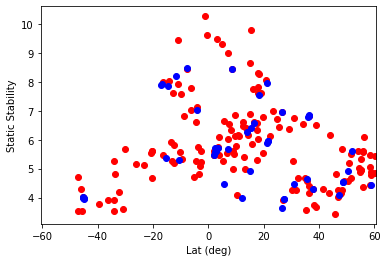

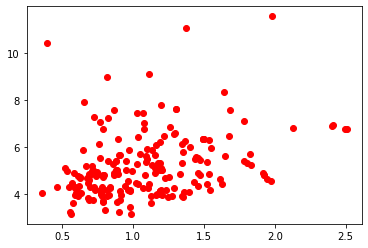

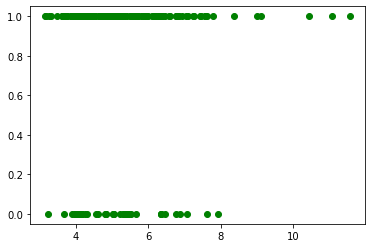

In [3]:
#plot static stability below tropopause 
plt.plot(lat[OT_flag ==1],trop_ss_a2[OT_flag==1],'ro')
plt.plot(lat[OT_flag ==0],trop_ss_a2[OT_flag==0],'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('Static Stability')
plt.show()

plt.plot(trop_ss_b3,trop_ss_a1,'ro')
plt.show()

plt.plot(trop_ss_a1,OT_flag,'go')
plt.show()


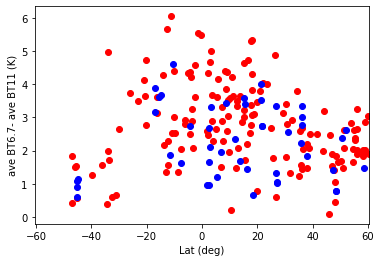

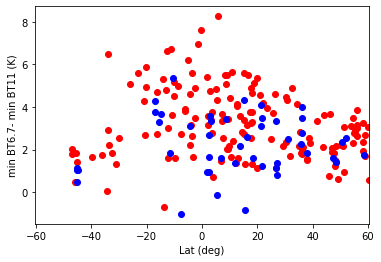

(array([112, 152, 153, 202]),)
197.3872


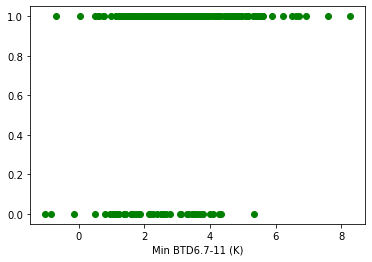

In [4]:
# to plot BTD 
BTD_0=OT_meanBT67[OT_flag == 0]-OT_meanBT11[OT_flag == 0]#
BTD_1=OT_meanBT67[OT_flag == 1]-OT_meanBT11[OT_flag == 1]
plt.plot(lat_1,BTD_1,'ro')
plt.plot(lat_0,BTD_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('ave BT6.7- ave BT11 (K)')
plt.show()

BTD_0=OT_minBT67[OT_flag == 0]-OT_minBT11[OT_flag == 0]
BTD_1=OT_minBT67[OT_flag == 1]-OT_minBT11[OT_flag == 1]
plt.plot(lat_1,BTD_1,'ro')
plt.plot(lat_0,BTD_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('min BT6.7- min BT11 (K)')
plt.show()
print(np.where((OT_minBT67-OT_minBT11) < 0.0))
plt.plot(OT_minBT67-OT_minBT11,OT_flag,'go')
plt.xlabel('Min BTD6.7-11 (K)')
print(OT_minBT67[112])


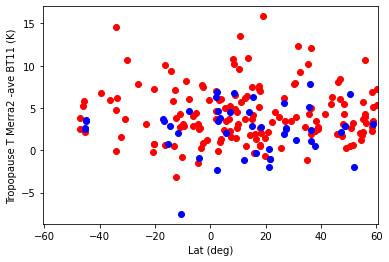

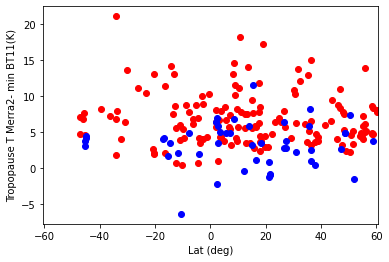

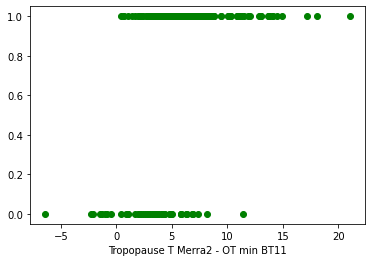

In [5]:
# to plot BTD BT11- tropopause
BTDt_0=trop_temp_merra[OT_flag == 0]-OT_meanBT11[OT_flag == 0]
BTDt_1=trop_temp_merra[OT_flag == 1]-OT_meanBT11[OT_flag == 1]
plt.plot(lat_1,BTDt_1,'ro')
plt.plot(lat_0,BTDt_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('Tropopause T Merra2 -ave BT11 (K)')
plt.show()

# to plot BTD BT11- tropopause
BTDt_0=trop_temp_merra[OT_flag == 0]-OT_minBT11[OT_flag == 0]
BTDt_1=trop_temp_merra[OT_flag == 1]-OT_minBT11[OT_flag == 1]
plt.plot(lat_1,BTDt_1,'ro')
plt.plot(lat_0,BTDt_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('Tropopause T Merra2- min BT11(K)')
plt.show()

plt.plot(trop_temp_merra-OT_minBT11,OT_flag,'go')
plt.xlabel('Tropopause T Merra2 - OT min BT11')
plt.show()

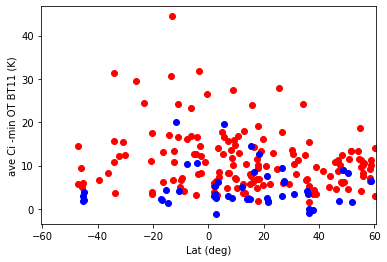

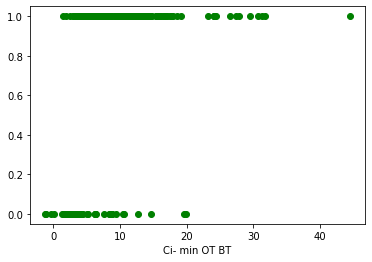

In [3]:

# to plot cirrus temperature
mean_ciBT11=(ci_lfBT11+ci_rtBT11)/2.0
mean_ciBT11[163]=ci_rtBT11[163] #correct one case

BTDc_0= mean_ciBT11[OT_flag == 0]-OT_minBT11[OT_flag == 0]
BTDc_1= mean_ciBT11[OT_flag == 1]-OT_minBT11[OT_flag == 1]
plt.plot(lat_1,BTDc_1,'ro')
plt.plot(lat_0,BTDc_0,'bo')
plt.xlim([-60.5,60.5])
plt.xlabel('Lat (deg)')
plt.ylabel('ave Ci -min OT BT11 (K)')
plt.show()

#BTDc_0= mean_ciBT11[OT_flag == 0]-OT_meanBT11[OT_flag == 0]
#BTDc_1= mean_ciBT11[OT_flag == 1]-OT_meanBT11[OT_flag == 1]
#plt.plot(lat_1,BTDc_1,'ro')
#plt.plot(lat_0,BTDc_0,'bo')
#plt.xlim([-60.5,60.5])
#plt.xlabel('Lat (deg)')
#plt.ylabel('ave Ci-OT BT11 (K)')
#plt.show()
#print(np.where((mean_ciBT11-OT_meanBT11) < -70))
plt.plot(mean_ciBT11-OT_minBT11,OT_flag,'go')
plt.xlabel('Ci- min OT BT')
plt.show()

[-3.40354]
[[0.20206583 0.34434363 0.56626195]]


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


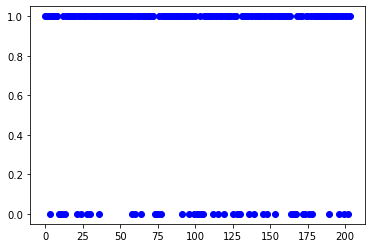

[[ 30  18]
 [ 18 138]]
[[17 13]
 [ 0 53]]
156.0 204 53.0 83


In [7]:
# logistic regression
X_train=np.zeros((Nrow,3),'f')
X_train[:,0]=mean_ciBT11-OT_minBT11
X_train[:,1]=trop_temp_merra-OT_minBT11
X_train[:,2]=OT_minBT67-OT_minBT11
#X_train[:,3]=lat
#X_train[:,4]=OT_minBT11

X_train_1=X_train[abs(lat) < 20,:]
OT_flag_1=OT_flag[abs(lat) < 20]
#==== check correlations ====
#print(spearmanr(X_train[:,0],X_train[:,1]))
#print(spearmanr(X_train[:,0],X_train[:,2]))
#print(spearmanr(X_train[:,1],X_train[:,2]))

#== create model and train it
model=LogisticRegression(solver='newton-cg',C=1,random_state=0)
result=model.fit(X_train,OT_flag)
print(model.intercept_)
print(model.coef_)
predict_OT= model.predict_proba(X_train)
#print(predict_OT)
#print(OT_flag)
plt.plot(OT_flag,'bo')
#plt.plot(predict_OT[:,1],'ro')
plt.show()


predict_OT= (predict_OT[:,1] >= 0.6).astype(int)
print(confusion_matrix(OT_flag,predict_OT))

# test data
data_test=read_text(fname8)
splitcol=data[0].split(' ')
Ncol_test=len(splitcol)-splitcol.count('')
Nrow_test=len(data_test)

# transfer data from string to float
dataT_test=np.zeros((Nrow_test,Ncol_test-1),'f')

for i in range(Nrow_test):
    splitcol=data_test[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and len(splitcol[j]) != 46:
            dataT_test[i,k]=float(splitcol[j])
            k=k+1

lon_test=dataT_test[:,0]
lat_test=dataT_test[:,1]
OT_minBT11_test=dataT_test[:,3]
OT_minBT67_test=dataT_test[:,5]
OT_meanBT11_test=dataT_test[:,4]
OT_meanBT67_test=dataT_test[:,6]
ci_lfBT11_test=dataT_test[:,7]
ci_rtBT11_test=dataT_test[:,8]
trop_temp_merra_test=dataT_test[:,10]
Y_test=dataT_test[:,18]

mean_ciBT11_test=(ci_lfBT11_test+ci_rtBT11_test)/2
X_test=np.zeros((Nrow_test,3),'f')
X_test[:,0]=mean_ciBT11_test-OT_minBT11_test
X_test[:,1]=trop_temp_merra_test-OT_minBT11_test
X_test[:,2]=OT_minBT67_test-OT_minBT11_test
#X_test[:,3]=lat_test
#X_test[:,4]=OT_minBT11_test

predict_OT= model.predict_proba(X_test)
predict_OT= (predict_OT[:,1] >= 0.6).astype(int)

print(confusion_matrix(Y_test,predict_OT))
print(sum(OT_flag),Nrow,sum(Y_test),Nrow_test)

In [5]:
#try standard models 
X_train=sm.add_constant(X_train)
model_sm=sm.Logit(OT_flag,X_train)
result=model_sm.fit(method='newton')
result.params

result.predict(X_train)
print(result.pred_table(threshold=0.7))
print(result.summary())

#test
X_test=sm.add_constant(X_test)
Y_test_predict=result.predict(X_test)

table = np.histogram2d(Y_test, ((Y_test_predict >= 0.7).astype(int)), bins=2)[0]
print(table)

Optimization terminated successfully.
         Current function value: 0.389432
         Iterations 7
[[ 35.  13.]
 [ 23. 133.]]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  204
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.2862
Time:                        22:12:30   Log-Likelihood:                -79.444
converged:                       True   LL-Null:                       -111.30
Covariance Type:            nonrobust   LLR p-value:                 1.461e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8449      0.488     -3.780      0.000      -2.802      -0.888
x1

In [ ]:
#visulize the fitting model 
c=-3.4755
b1=0.2031
b2=0.3488
b3=0.5856
Nz=100
x1=np.arange(-1,48.5,0.5)
x2=np.arange(-1,23.75,0.25)
x3=np.arange(-0.5,9.4,0.1)
z=np.zeros(99)
fx=c+b1*x1+b2*x2+b3*x3
print(fx)
z=1.0/(1.0+math.exp(0.0-fx))
print(z)
